In [112]:
import time

# functions defined from the source code of heapq()

def my_heappush(heap, item):
    # Push item onto heap, to maintain the heap invariant
    heap.append(item)
    my_siftdown(heap, 0, len(heap) -1)
    
    
# 'heap' is a heap at all indices >= startpos except possibly for pos
# pos is the index of a leaf with a possibly out-of-order value.
def my_siftdown(heap, startpos, pos):
    newitem = heap[pos]
    #Follow path to the root, moving parents down until finding a place 'newitem' fits
    while pos> startpos:
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem
    
def my_heappop(heap):
    # Pops the smallest item off the heap, to maintain heap invariant
    lastelt = heap.pop() #if heap is empty raise appropriate IndexError
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        my_siftup(heap, 0)
        return returnitem
    return lastelt
    
def my_siftup(heap, pos):
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Smaller child is 'bubbled up' until hitting a leaf.
    childpos = 2*pos + 1 # leftmost child position
    while childpos < endpos:
         # Index of smaller child is set to childpos
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move  smaller child up
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2*pos + 1
    # Leaf at pos is empty now.
    # Insert and bubble up newitem by sifting its parents down
    heap[pos] = newitem
    my_siftdown(heap, startpos, pos)
        
    
# open-source code for Dijkstra's algorithm

def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph} #unkown distance
    distances[starting_vertex] = 0
    
    c=0   # iteration starts

# a customized function 'pq' is created 

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = my_heappop(pq)

        # Nodes can get added to the priority queue multiple times.
        # if a vertex is processed the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:     # ensures a vertex is processed only once
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight  #ensures the distances build up 
            print(f"Neighbor: {neighbor}, weight: {weight}, distance: {distance}")
 # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:  #consider all neighbor vetrices
                distances[neighbor] = distance
                my_heappush(pq, (distance, neighbor))
                c=c+1  # iteration ends
    print(c)   # prints how many iterations are done given a sample size

    return distances
                

example_graph = {   # for n=6
    'U': {'V': 2, 'W': 5, 'X': 1},
    'V': {'U': 2, 'X': 2, 'W': 3},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1},
    'Y': {'X': 1, 'W': 1, 'Z': 1},
    'Z': {'W': 5, 'Y': 1},
}

    
start = time.time()
print(calculate_distances(example_graph, 'X'))
end = time.time()
print(end-start)      # calculate total running time     
        

Neighbor: U, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 2
Neighbor: W, weight: 3, distance: 3
Neighbor: Y, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 3
Neighbor: W, weight: 5, distance: 6
Neighbor: X, weight: 1, distance: 2
Neighbor: X, weight: 1, distance: 2
Neighbor: W, weight: 1, distance: 2
Neighbor: Z, weight: 1, distance: 2
Neighbor: U, weight: 2, distance: 4
Neighbor: X, weight: 2, distance: 4
Neighbor: W, weight: 3, distance: 5
Neighbor: V, weight: 3, distance: 5
Neighbor: U, weight: 5, distance: 7
Neighbor: X, weight: 3, distance: 5
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 5, distance: 7
Neighbor: W, weight: 5, distance: 7
Neighbor: Y, weight: 1, distance: 3
6
{'U': 1, 'V': 2, 'W': 2, 'X': 0, 'Y': 1, 'Z': 2}
0.0008318424224853516


In [105]:
example_graph_2 = {      # for n=8
    'U': {'V': 2, 'W': 5, 'X': 1},
    'V': {'U': 2, 'X': 2, 'W': 3, 'K': 5},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5, 'K': 1},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1, },
    'Y': {'X': 1, 'W': 1, 'Z': 1, 'M': 1},
    'Z': {'W': 5, 'Y': 1, 'M': 3},
    'K': {'V': 5, 'W': 1},
    'M': {'Y': 1, 'Z': 3},
}

start = time.time()
print(calculate_distances(example_graph_2, 'X'))
end = time.time()
print(end-start)  

Neighbor: U, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 2
Neighbor: W, weight: 3, distance: 3
Neighbor: Y, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 3
Neighbor: W, weight: 5, distance: 6
Neighbor: X, weight: 1, distance: 2
Neighbor: X, weight: 1, distance: 2
Neighbor: W, weight: 1, distance: 2
Neighbor: Z, weight: 1, distance: 2
Neighbor: M, weight: 1, distance: 2
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 3, distance: 5
Neighbor: U, weight: 2, distance: 4
Neighbor: X, weight: 2, distance: 4
Neighbor: W, weight: 3, distance: 5
Neighbor: K, weight: 5, distance: 7
Neighbor: V, weight: 3, distance: 5
Neighbor: U, weight: 5, distance: 7
Neighbor: X, weight: 3, distance: 5
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 5, distance: 7
Neighbor: K, weight: 1, distance: 3
Neighbor: W, weight: 5, distance: 7
Neighbor: Y, weight: 1, distance: 3
Neighbor: M, weight: 3, distance: 5
Neighbor: V, weight: 5, distance: 8
Neighbor: W, weight: 1, dist

In [107]:
example_graph_3 = {    # for n=10
    'U': {'V': 2, 'W': 5, 'X': 1},
    'V': {'U': 2, 'X': 2, 'W': 3, 'K': 5},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5, 'K': 1, 'O': 2},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1, },
    'Y': {'X': 1, 'W': 1, 'Z': 1, 'M': 1, 'N': 5},
    'Z': {'W': 5, 'Y': 1, 'M': 3},
    'K': {'V': 5, 'W': 1, 'O': 4 },
    'M': {'Y': 1, 'Z': 3, 'N': 3},
    'N': {'Y': 5, 'M': 3},
    'O': {'K': 4, 'W': 2},
    
}
start = time.time()
print(calculate_distances(example_graph_3, 'X'))
end = time.time()
print(end-start)  

Neighbor: U, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 2
Neighbor: W, weight: 3, distance: 3
Neighbor: Y, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 3
Neighbor: W, weight: 5, distance: 6
Neighbor: X, weight: 1, distance: 2
Neighbor: X, weight: 1, distance: 2
Neighbor: W, weight: 1, distance: 2
Neighbor: Z, weight: 1, distance: 2
Neighbor: M, weight: 1, distance: 2
Neighbor: N, weight: 5, distance: 6
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 3, distance: 5
Neighbor: N, weight: 3, distance: 5
Neighbor: U, weight: 2, distance: 4
Neighbor: X, weight: 2, distance: 4
Neighbor: W, weight: 3, distance: 5
Neighbor: K, weight: 5, distance: 7
Neighbor: V, weight: 3, distance: 5
Neighbor: U, weight: 5, distance: 7
Neighbor: X, weight: 3, distance: 5
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 5, distance: 7
Neighbor: K, weight: 1, distance: 3
Neighbor: O, weight: 2, distance: 4
Neighbor: W, weight: 5, distance: 7
Neighbor: Y, weight: 1, dist

In [108]:
example_graph_4 = {   # for n=14
    'U': {'V': 2, 'W': 5, 'X': 1, 'P': 7},
    'V': {'U': 2, 'X': 2, 'W': 3, 'K': 5},
    'W': {'V': 3, 'U': 5, 'X': 3, 'Y': 1, 'Z': 5, 'K': 1, 'O': 2},
    'X': {'U': 1, 'V': 2, 'W': 3, 'Y': 1, },
    'Y': {'X': 1, 'W': 1, 'Z': 1, 'M': 1, 'N': 5},
    'Z': {'W': 5, 'Y': 1, 'M': 3, 'S': 4, 'R': 5},
    'K': {'V': 5, 'W': 1, 'O': 4 },
    'M': {'Y': 1, 'Z': 3, 'N': 3, 'R': 4, 'Q': 3},
    'N': {'Y': 5, 'M': 3},
    'O': {'K': 4, 'W': 2, 'P': 1, 'S': 2},
    'P': {'U': 7, 'O': 1},
    'S': {'O': 2, 'Z': 4, 'R': 3},
    'R': {'S': 3, 'Z': 5, 'M': 4, 'Q': 2},
    'Q': {'R': 2, 'M': 3},
}
start = time.time()
print(calculate_distances(example_graph_4, 'X'))
end = time.time()
print(end-start)  

Neighbor: U, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 2
Neighbor: W, weight: 3, distance: 3
Neighbor: Y, weight: 1, distance: 1
Neighbor: V, weight: 2, distance: 3
Neighbor: W, weight: 5, distance: 6
Neighbor: X, weight: 1, distance: 2
Neighbor: P, weight: 7, distance: 8
Neighbor: X, weight: 1, distance: 2
Neighbor: W, weight: 1, distance: 2
Neighbor: Z, weight: 1, distance: 2
Neighbor: M, weight: 1, distance: 2
Neighbor: N, weight: 5, distance: 6
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 3, distance: 5
Neighbor: N, weight: 3, distance: 5
Neighbor: R, weight: 4, distance: 6
Neighbor: Q, weight: 3, distance: 5
Neighbor: U, weight: 2, distance: 4
Neighbor: X, weight: 2, distance: 4
Neighbor: W, weight: 3, distance: 5
Neighbor: K, weight: 5, distance: 7
Neighbor: V, weight: 3, distance: 5
Neighbor: U, weight: 5, distance: 7
Neighbor: X, weight: 3, distance: 5
Neighbor: Y, weight: 1, distance: 3
Neighbor: Z, weight: 5, distance: 7
Neighbor: K, weight: 1, dist

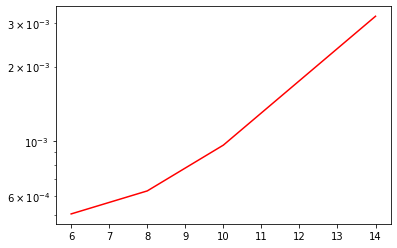

In [99]:
import matplotlib.pyplot as plt   # plot relationship between sample size and total running time
#n is the number of vertices
n=[6, 8, 10, 14]
times= [0.0005068778991699219, 0.0006279945373535156, 0.0009620189666748047, 0.0031957626342773438]
plt.plot(n,times, 'r')
plt.yscale('log')
plt.show()